# Practical Exam: House sales

RealAgents is a real estate company that focuses on selling houses.

RealAgents sells a variety of types of house in one metropolitan area.

Some houses sell slowly and sometimes require lowering the price in order to find a buyer.

In order to stay competitive, RealAgents would like to optimize the listing prices of the houses it is trying to sell.

They want to do this by predicting the sale price of a house given its characteristics.

If they can predict the sale price in advance, they can decrease the time to sale.


## Data

The dataset contains records of previous houses sold in the area.

| Column Name | Criteria                                                |
|-------------|---------------------------------------------------------|
| house_id    | Nominal. </br> Unique identifier for houses. </br>Missing values not possible. |
| city        | Nominal. </br>The city in which the house is located. One of 'Silvertown', 'Riverford', 'Teasdale' and 'Poppleton'. </br>Replace missing values with "Unknown". |
| sale_price  | Discrete. </br>The sale price of the house in whole dollars. Values can be any positive number greater than or equal to zero.</br>Remove missing entries. |
| sale_date   | Discrete. </br>The date of the last sale of the house. </br>Replace missing values with 2023-01-01. |
| months_listed  | Continuous. </br>The number of months the house was listed on the market prior to its last sale, rounded to one decimal place. </br>Replace missing values with mean number of months listed, to one decimal place. |
| bedrooms    | Discrete. </br>The number of bedrooms in the house. Any positive values greater than or equal to zero. </br>Replace missing values with the mean number of bedrooms, rounded to the nearest integer. |
| house_type   | Ordinal. </br>One of "Terraced" (two shared walls), "Semi-detached" (one shared wall), or "Detached" (no shared walls). </br>Replace missing values with the most common house type. |
| area      | Continuous. </br>The area of the house in square meters, rounded to one decimal place. </br>Replace missing values with the mean, to one decimal place. |


# Task 1

The team at RealAgents knows that the city that a property is located in makes a difference to the sale price. 

Unfortuntately they believe that this isn't always recorded in the data. 

Calculate the number of missing values of the `city`. 

 - You should use the data in the file "house_sales.csv". 

 - Your output should be an object `missing_city`, that contains the number of missing values in this column. 

In [37]:
import pandas as pd

# Load the data, specifying additional na_values
data = pd.read_csv('house_sales.csv', na_values=['--', '-', 'missing', 'n/a', 'na', ''])

# Calculate the number of missing values in the 'city' column
missing_city = data['city'].isnull().sum()

print(missing_city)

73


# Task 2 

Before you fit any models, you will need to make sure the data is clean. 

The table below shows what the data should look like. 

Create a cleaned version of the dataframe. 

 - You should start with the data in the file "house_sales.csv". 

 - Your output should be a dataframe named `clean_data`. 

 - All column names and values should match the table below.


| Column Name | Criteria                                                |
|-------------|---------------------------------------------------------|
| house_id    | Nominal. </br> Unique identifier for houses. </br>Missing values not possible. |
| city        | Nominal. </br>The city in which the house is located. One of 'Silvertown', 'Riverford', 'Teasdale' and 'Poppleton' </br>Replace missing values with "Unknown". |
| sale_price  | Discrete. </br>The sale price of the house in whole dollars. Values can be any positive number greater than or equal to zero.</br>Remove missing entries. |
| sale_date   | Discrete. </br>The date of the last sale of the house. </br>Replace missing values with 2023-01-01. |
| months_listed  | Continuous. </br>The number of months the house was listed on the market prior to its last sale, rounded to one decimal place. </br>Replace missing values with mean number of months listed, to one decimal place. |
| bedrooms    | Discrete. </br>The number of bedrooms in the house. Any positive values greater than or equal to zero. </br>Replace missing values with the mean number of bedrooms, rounded to the nearest integer. |
| house_type   | Ordinal. </br>One of "Terraced", "Semi-detached", or "Detached". </br>Replace missing values with the most common house type. |
| area      | Continuous. </br>The area of the house in square meters, rounded to one decimal place. </br>Replace missing values with the mean, to one decimal place. |

In [38]:
# Use this cell to write your code for Task 2
import pandas as pd

# checked unique values : showed -- as a value in city, replace to nan
data = pd.read_csv("house_sales.csv", na_values=["--"])

# missing values 'city'
data['city'].fillna("Unknown", inplace=True)
print("Unique values in 'city' column:", data['city'].unique())

# missing entries 'sale_price'
data.dropna(subset=['sale_price'], inplace=True)
# missing 'sale_date'
data['sale_date'].fillna("2023-01-01", inplace=True)

# missing 'months_listed'
data['months_listed'].fillna(data['months_listed'].mean().round(1), inplace=True)
print("Unique values in 'months_listed' column:", data['months_listed'].unique())

# missing 'bedrooms' 
print("Unique values in 'bedrooms' column:", df['bedrooms'].unique())
data['bedrooms'].fillna(round(data['bedrooms'].mean()), inplace=True)

# missing 'house_type' 
data['house_type'].replace({'Det.': 'Detached', 'Terr.': 'Terraced', 'Semi': 'Semi-detached'}, inplace=True)
print("Unique values in 'house_type' column:", data['house_type'].unique())

# missing values 'area' 
data['area'] = data['area'].str.replace(' sq.m.', '').astype(float)
data['area'].fillna(data['area'].mean(), inplace=True)

# make sure area is only float, no strings or nan
print("is 'area' column float:", data['area'].dtype)
print("missing values in 'area' column:", data['area'].isna().sum())

clean_data = data.copy()
print(clean_data.head())

Unique values in 'city' column: ['Silvertown' 'Riverford' 'Teasdale' 'Poppleton' 'Unknown']
Unique values in 'months_listed' column: [ 5.4  6.3  6.9  6.1  8.7  5.1  5.9  5.8  4.4  3.   4.6  3.7  6.2  5.3
  3.5  5.   5.5  7.8  4.9  4.7  8.9  3.8  4.8  7.6  6.4  7.9  6.6  4.1
  7.4  7.1  6.7  3.9  4.3  8.1  6.5  7.7  5.2  2.6  4.2  1.2  8.   5.6
  3.3  7.3  9.4  8.8  6.   3.6  3.2  8.5  4.5 10.4  9.2  1.7 10.2  0.8
  5.7  2.   2.3  8.6  7.5  9.6  9.7  6.8  2.2  2.5  4.   8.3 10.7  2.7
  3.4  7.   9.1  2.8  8.2 11.4 10.   2.9 10.1  7.2 10.5  9.9  3.1  9.3
  9.   1.3  8.4 11.   1.9 12.3  9.5  2.1  9.8  2.4  0.5 11.5  1.8  1.6
  1.5 10.8  1.4 11.6 10.3 10.6  0.6 11.3 11.7 11.8  1.1  1.  10.9]
Unique values in 'bedrooms' column: [2 5 6 4 3]
Unique values in 'house_type' column: ['Semi-detached' 'Detached' 'Terraced']
is 'area' column float: float64
missing values in 'area' column: 0
   house_id        city  sale_price  ... bedrooms     house_type   area
0   1217792  Silvertown       55943  .

In [ ]:
# option 2
import pandas as pd

def transform_data(data):
    # Transform 'city' column
    data['city'].fillna('Unknown', inplace=True)
    data['city'] = data['city'].astype('category')

    # Transform 'sale_date' column
    data['sale_date'].fillna('2023-01-01', inplace=True)

    # Transform 'months_listed' column
    mean_months_listed = data['months_listed'].mean()
    data['months_listed'].fillna(round(mean_months_listed, 1), inplace=True)

    # Transform 'bedrooms' column
    mean_bedrooms = data['bedrooms'].mean()
    data['bedrooms'].fillna(round(mean_bedrooms), inplace=True)

    # Transform 'house_type' column
    category_order = ['Terraced', 'Semi-detached', 'Detached']

    # Convert 'house_type' column to ordinal categorical data
    data['house_type'] = pd.Categorical(data['house_type'], categories=category_order, ordered=True)
    most_common_house_type = data['house_type'].mode()[0]
    data['house_type'].fillna(most_common_house_type, inplace=True)

    # Transform 'area' column
    data['area'] = data['area'].str.replace(' sq.m.', '').astype(float)
    mean_area = data['area'].mean()
    data['area'].fillna(round(mean_area, 1), inplace=True)

    return data


data = pd.read_csv('house_sales.csv')

# Apply transformations to the training and validation data
clean_data = transform_data(data)

# Task 3 

The team at RealAgents have told you that they have always believed that the number of bedrooms is the biggest driver of house price. 

Producing a table showing the difference in the average sale price by number of bedrooms along with the variance to investigate this question for the team.

 - You should start with the data in the file 'house_sales.csv'.

 - Your output should be a data frame named `price_by_rooms`. 

 - It should include the three columns `bedrooms`, `avg_price`, `var_price`. 

 - Your answers should be rounded to 1 decimal place.   

   bedrooms  avg_price     var_price
0         2    67076.4  5.652896e+08
1         3   154665.1  2.378289e+09
2         4   234704.6  1.725211e+09
3         5   301515.9  2.484328e+09
4         6   375741.3  3.924432e+09


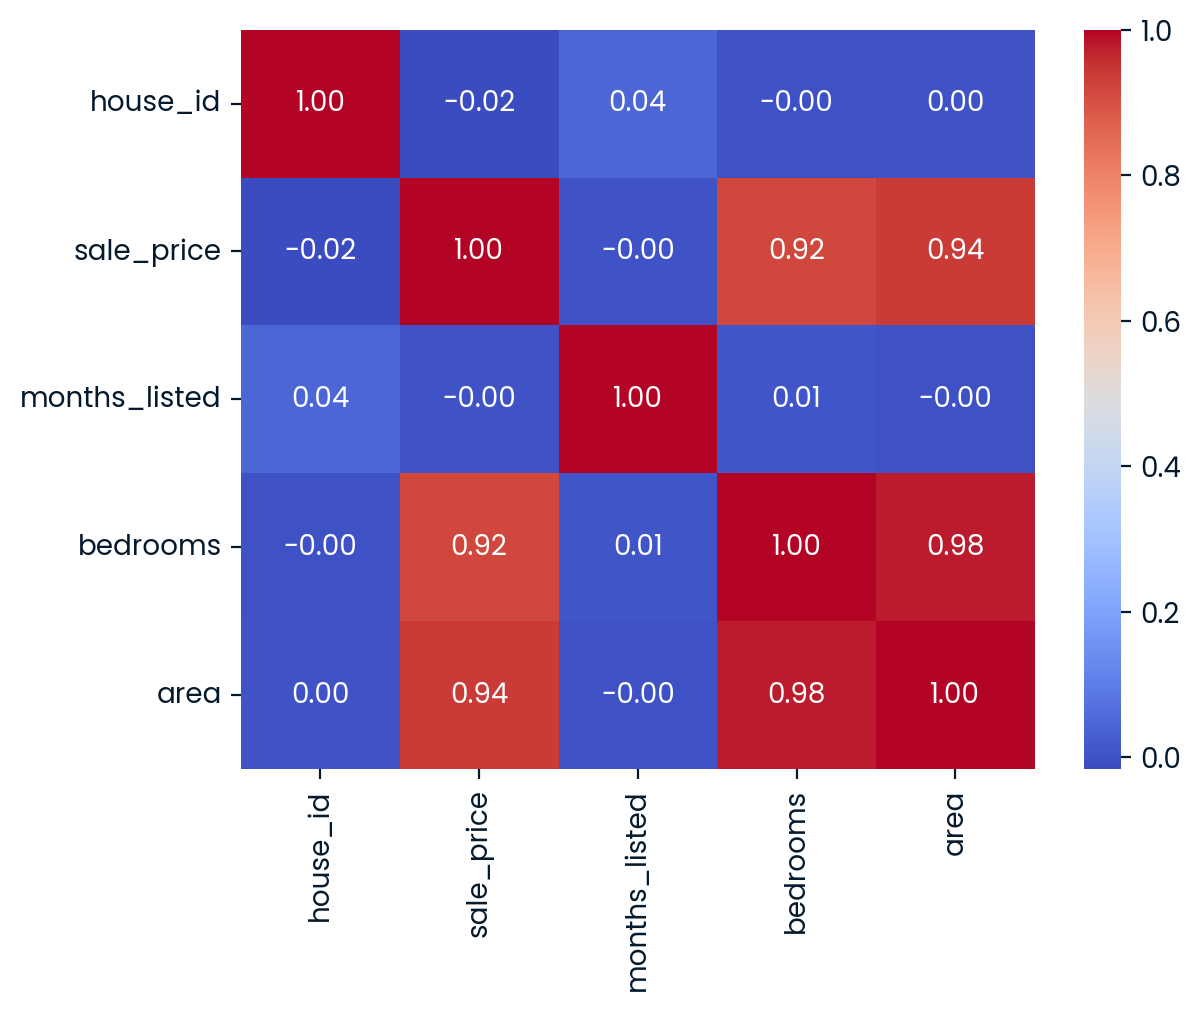

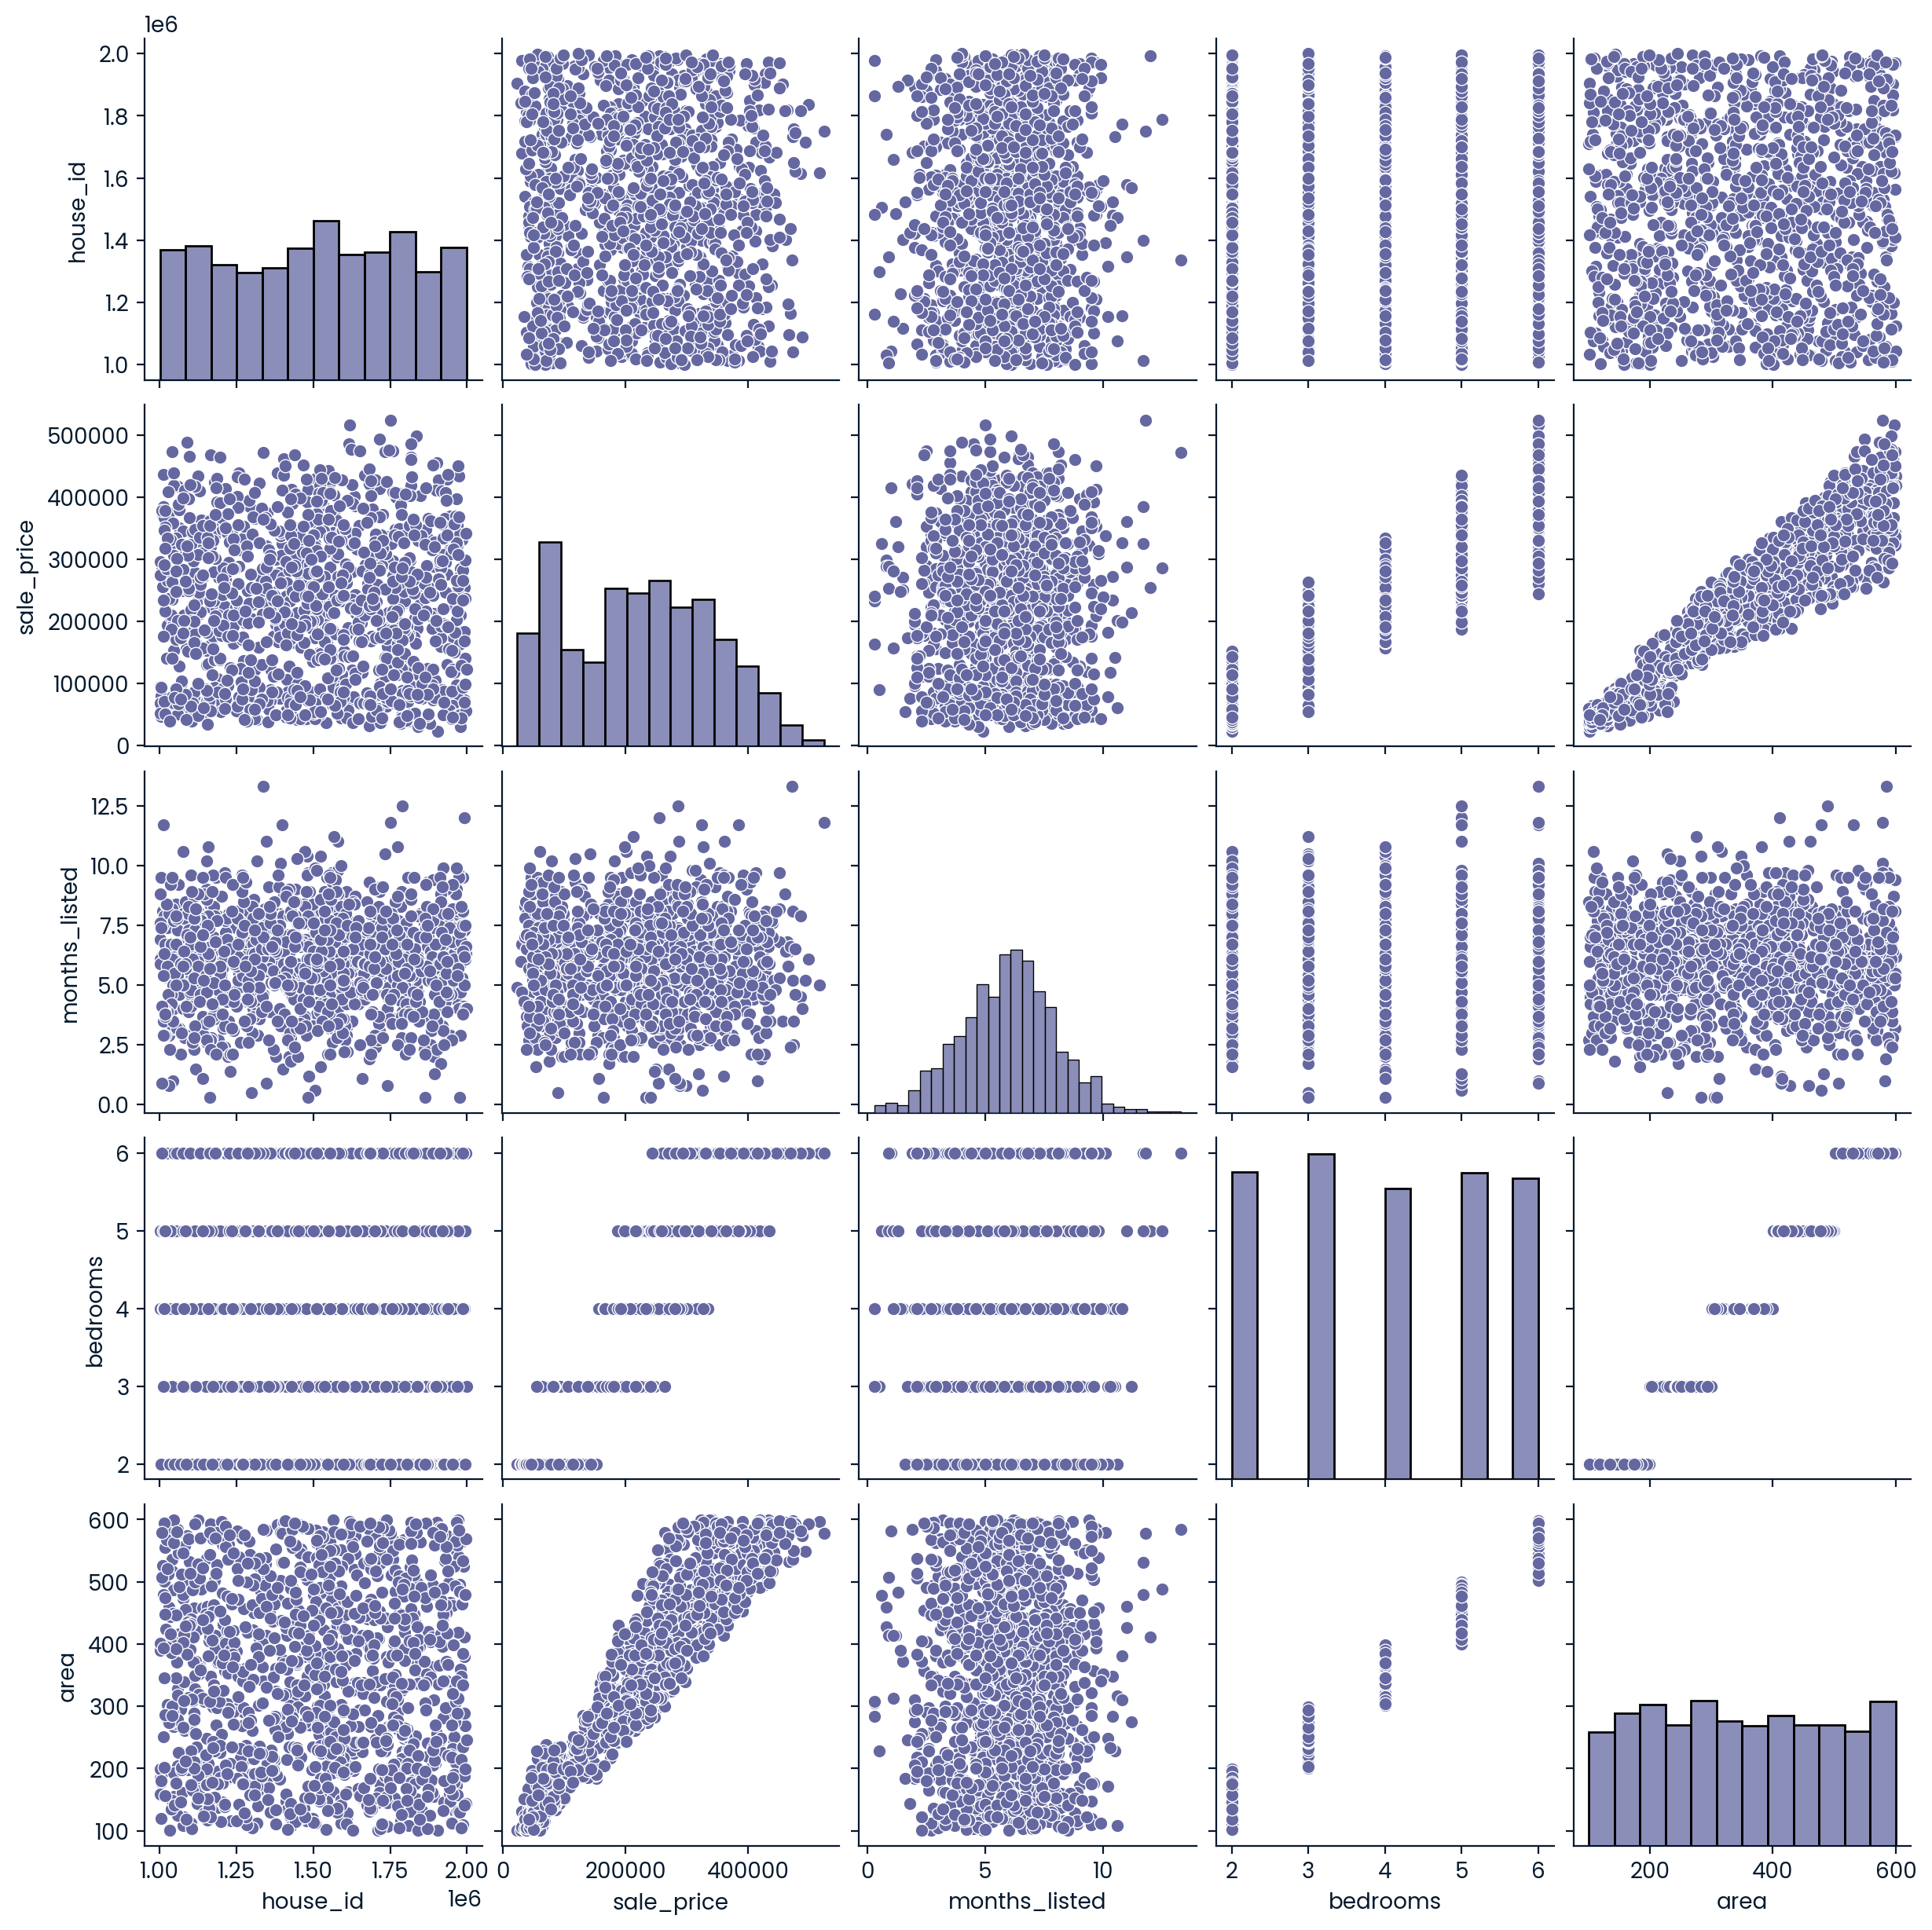

In [39]:
# Use this cell to write your code for Task 3
# Convert 'sale_price' to numeric (in case it's not already)
data['sale_price'] = pd.to_numeric(data['sale_price'], errors='coerce')

# Calculate average sale price and variance by number of bedrooms
price_by_rooms = data.groupby('bedrooms')['sale_price'].agg(['mean', 'var']).reset_index()
price_by_rooms = price_by_rooms.rename(columns={'mean': 'avg_price', 'var': 'var_price'})

# Round the values to one decimal place
price_by_rooms['avg_price'] = price_by_rooms['avg_price'].round(1)
price_by_rooms['var_price'] = price_by_rooms['var_price'].round(1)

# Display the resulting table
print(price_by_rooms)

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# check corr to keep the most relevant
train_data = pd.read_csv('train.csv')
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

sns.pairplot(train_data)
plt.show()

# Task 4

Fit a baseline model to predict the sale price of a house.

 1. Fit your model using the data contained in “train.csv” </br></br>

 2. Use “validation.csv” to predict new values based on your model. You must return a dataframe named `base_result`, that includes `house_id` and `price`. The price column must be your predicted values.

In [40]:
# Use this cell to write your code for Task 4
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE

# Load the training and validation datasets
train_data = pd.read_csv('train.csv')
val_data = pd.read_csv('validation.csv')

# Transformation functions
def transform_city(data):
    data['city'].fillna('Unknown', inplace=True)

def transform_sale_date(data):
    data['sale_date'].fillna('2023-01-01', inplace=True)

def transform_months_listed(data):
    mean_months_listed = data['months_listed'].mean()
    data['months_listed'].fillna(round(mean_months_listed, 1), inplace=True)

def transform_bedrooms(data):
    mean_bedrooms = data['bedrooms'].mean()
    data['bedrooms'].fillna(round(mean_bedrooms), inplace=True)

def transform_house_type(data):
    most_common_house_type = data['house_type'].mode()[0]
    data['house_type'].fillna(most_common_house_type, inplace=True)

def transform_area(data):
    mean_area = data['area'].mean()
    data['area'].fillna(round(mean_area, 1), inplace=True)

# Apply transformations to the training data
transform_city(train_data)
transform_sale_date(train_data)
transform_months_listed(train_data)
transform_bedrooms(train_data)
transform_house_type(train_data)
transform_area(train_data)

# Apply transformations to the validation data
transform_city(val_data)
transform_sale_date(val_data)
transform_months_listed(val_data)
transform_bedrooms(val_data)
transform_house_type(val_data)
transform_area(val_data)

# Fit a Linear Regression model
model = LinearRegression()

# Encode 'house_type' and 'city' columns
train_data = pd.get_dummies(train_data, columns=['house_type', 'city'])
val_data = pd.get_dummies(val_data, columns=['house_type', 'city'])


# Convert to datetime to get year, month, day
train_data['sale_date'] = pd.to_datetime(train_data['sale_date'])
val_data['sale_date'] = pd.to_datetime(val_data['sale_date'])


# Extract useful date-related features in train_data
train_data['sale_year'] = train_data['sale_date'].dt.year
train_data['sale_month'] = train_data['sale_date'].dt.month
train_data['sale_day'] = train_data['sale_date'].dt.day

# Repeat the same process for val_data
val_data['sale_date'] = pd.to_datetime(val_data['sale_date'])
val_data['sale_year'] = val_data['sale_date'].dt.year
val_data['sale_month'] = val_data['sale_date'].dt.month
val_data['sale_day'] = val_data['sale_date'].dt.day

# Drop the original 'sale_date' columns
train_data.drop('sale_date', axis=1, inplace=True)
val_data.drop('sale_date', axis=1, inplace=True)

# Fit model, seperating features and targets
model.fit(train_data.drop('sale_price', axis=1), train_data['sale_price'])

# Make predictions on the validation data
predicted_prices = model.predict(val_data)

# Create the base_result dataframe with house_id and predicted price
base_result = pd.DataFrame({'house_id': val_data['house_id'], 'price': predicted_prices})

# Display the resulting dataframe
print(base_result)

     house_id          price
0     1331375  121709.813918
1     1630115  304232.551410
2     1645745  384418.334267
3     1336775  125014.708890
4     1888274  270695.083194
..        ...            ...
295   1986255  349092.841750
296   1896276  368686.764539
297   1758223  257195.388196
298   1752010  169083.390810
299   1651404  388790.116582

[300 rows x 2 columns]


# Task 5

Fit a comparison model to predict the sale price of a house.

 1. Fit your model using the data contained in “train.csv” </br></br>

 2. Use “validation.csv” to predict new values based on your model. You must return a dataframe named `compare_result`, that includes `house_id` and `price`. The price column must be your predicted values.

In [41]:
# Use this cell to write your code for Task 5
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# Load the training and validation datasets
train_data = pd.read_csv('train.csv')
val_data = pd.read_csv('validation.csv')

# Transformation functions
def transform_city(data):
    data['city'].fillna('Unknown', inplace=True)

def transform_sale_date(data):
    data['sale_date'].fillna('2023-01-01', inplace=True)

def transform_months_listed(data):
    mean_months_listed = data['months_listed'].mean()
    data['months_listed'].fillna(round(mean_months_listed, 1), inplace=True)

def transform_bedrooms(data):
    mean_bedrooms = data['bedrooms'].mean()
    data['bedrooms'].fillna(round(mean_bedrooms), inplace=True)

def transform_house_type(data):
    most_common_house_type = data['house_type'].mode()[0]
    data['house_type'].fillna(most_common_house_type, inplace=True)

def transform_area(data):
    mean_area = data['area'].mean()
    data['area'].fillna(round(mean_area, 1), inplace=True)

# Apply transformations to the training data
transform_city(train_data)
transform_sale_date(train_data)
transform_months_listed(train_data)
transform_bedrooms(train_data)
transform_house_type(train_data)
transform_area(train_data)

# Apply transformations to the validation data
transform_city(val_data)
transform_sale_date(val_data)
transform_months_listed(val_data)
transform_bedrooms(val_data)
transform_house_type(val_data)
transform_area(val_data)

# Fit a Linear Regression model
model = RandomForestRegressor()

# Encode 'house_type' and 'city' columns
train_data = pd.get_dummies(train_data, columns=['house_type', 'city'])
val_data = pd.get_dummies(val_data, columns=['house_type', 'city'])


# Convert to datetime to get year, month, day
train_data['sale_date'] = pd.to_datetime(train_data['sale_date'])
val_data['sale_date'] = pd.to_datetime(val_data['sale_date'])


# Extract useful date-related features in train_data
train_data['sale_year'] = train_data['sale_date'].dt.year
train_data['sale_month'] = train_data['sale_date'].dt.month
train_data['sale_day'] = train_data['sale_date'].dt.day

# Repeat the same process for val_data
val_data['sale_date'] = pd.to_datetime(val_data['sale_date'])
val_data['sale_year'] = val_data['sale_date'].dt.year
val_data['sale_month'] = val_data['sale_date'].dt.month
val_data['sale_day'] = val_data['sale_date'].dt.day

# Drop the original 'sale_date' columns
train_data.drop('sale_date', axis=1, inplace=True)
val_data.drop('sale_date', axis=1, inplace=True)

# Fit model, seperating features and targets
model.fit(train_data.drop('sale_price', axis=1), train_data['sale_price'])

# Make predictions on the validation data
predicted_prices = model.predict(val_data)

# Create the base_result dataframe with house_id and predicted price
compare_result = pd.DataFrame({'house_id': val_data['house_id'], 'price': predicted_prices})

# Display the resulting dataframe
print(compare_result)

import math
import numpy as np
y1 = base_result["price"]
y2 = compare_result["price"]

MSE = np.square(np.subtract(y1,y2)).mean() 

RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

     house_id      price
0     1331375   80598.91
1     1630115  308416.54
2     1645745  401147.29
3     1336775  105839.79
4     1888274  259606.73
..        ...        ...
295   1986255  362121.05
296   1896276  385983.10
297   1758223  258967.79
298   1752010  172446.28
299   1651404  418728.77

[300 rows x 2 columns]
Root Mean Square Error:

18342.174200821497
